CAP 6315: Soc Networks/Big Data Analytics Programming Assignment #1
Assignment learning objectives:
• Students will be able to use NetworkX library to create and visualize social
networks, as well as extract meaningful metrics from it.
• Students will learn to interpret the results of social network analysis by using the
network properties such as network diameter, edge density, and clustering
coefficient.
• Students will learn to detect influential nodes by using graph centrality.
Instructions
• Download the dataset: https://networkrepository.com/rt-twitter-copen.php
• The dataset is in .mtx format. You can read the data by using this line of code ‘matrix
= mmread('rt-twitter-copen.mtx')’, while also importing ‘from scipy.io import
mmread’. Finally, you can create a graph with ‘G =
nx.from_scipy_sparse_array(matrix)’.
• Your submission should include the complete Jupyter Notebook following the
steps outlined below. Be sure to include everything! It’s helpful if you add the steps
as comments in your code, followed by the code block or markdown cells that
represent the answers.
• Leave the code outputs in the notebook. Codes without visible outputs will lose
0.25 points for each missing output.
• Your code (submission) should be named YourLastName_Assignment1.ipynb and
it should be submitted to Canva.s before the deadline

Assignment
• Using NetworkX library and Pandas/Matplotlib, follow the steps below:


In [10]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


1. Load the data and build a graph using network library. (0.5 points)

In [11]:
from scipy.io import mmread
# Load the data
matrix = mmread('rt-twitter-copen.mtx')

# Build a graph using network library
G = nx.from_scipy_sparse_array(matrix)

print(G)


Graph with 761 nodes and 1029 edges


2. Visualize the graph. (0.5 points)

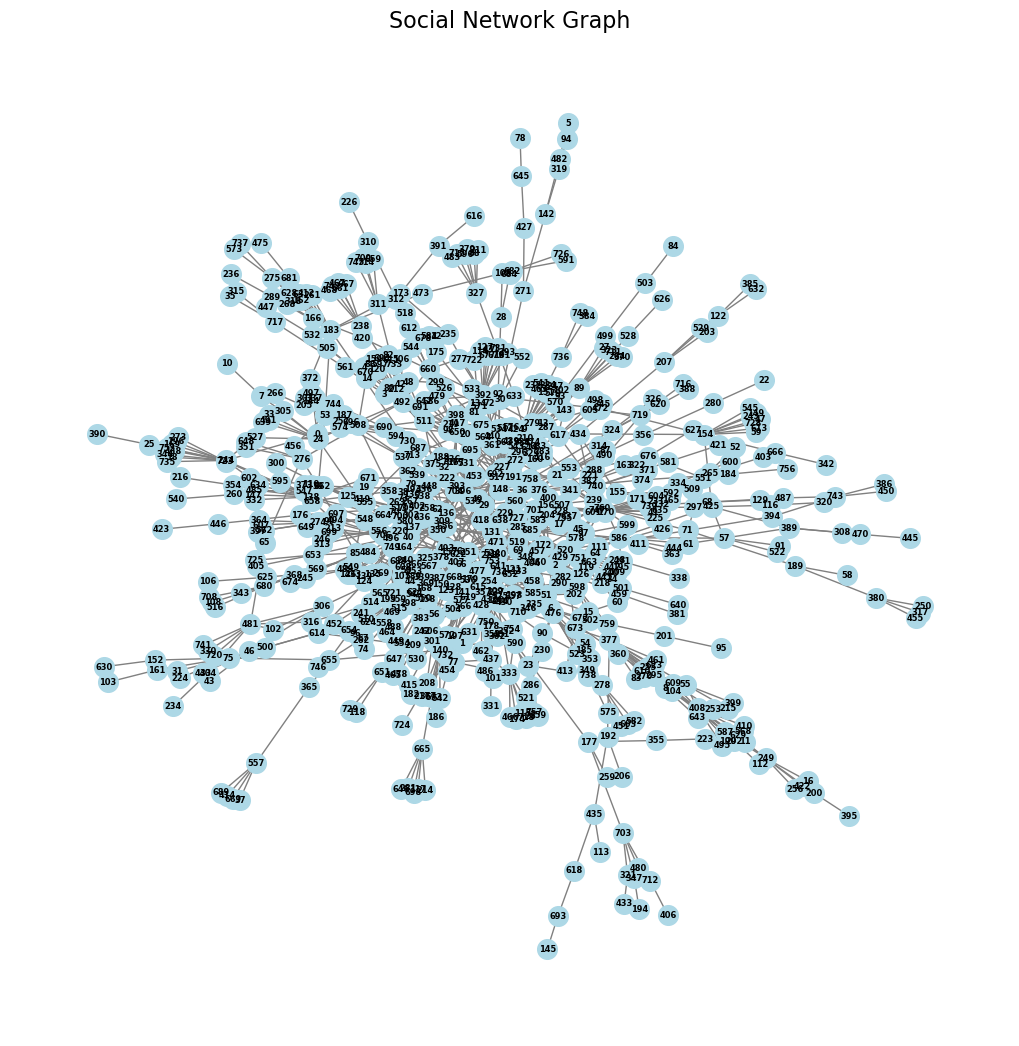

In [14]:
# Visualize the graph
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=200, node_color="lightblue", font_size=6, font_weight='bold', edge_color="gray")
plt.title("Social Network Graph", fontsize=16)
plt.show()

3. Calculate the number of nodes in the graph. (0.5 points)

In [15]:
nodes= G.number_of_nodes()
print(" Number of Nodes in the graph:", nodes)

 Number of Nodes in the graph: 761


4. Calculate the number of edges in the graph. (0.5 points)

In [16]:
edges= G.number_of_edges()
print("Number of Edges in the graph:", edges)

Number of Edges in the graph: 1029


5. Calculate the network diameter. (0.5 points)

In [18]:
if nx.is_connected(G):
    largest_connected_component = G
else:
    print("Graph is not connected. The diameter will be calculated for the largest connected component.")
# Finding the largest connected component
    largest_connected_components_nodes = max(nx.connected_components(G), key=len)
    largest_connected_component = G.subgraph(largest_connected_components_nodes)

# Calculate the diameter of the (largest) connected component
diameter = nx.diameter(largest_connected_component)
print(f"Network Diameter: {diameter}")

Network Diameter: 14


6. Add a markdown cell. In your own words, interpret the meaning of obtained value for network diameter. (0.5 points)
   
ANSWER: I got the network diameter as 14. As we know, network diameter is the maximum of the shortest paths between 2 nodes in the graph. 14 is the maximum shortest distance between 2 nodes, which is 14 retweets. 

7. Plot a histogram representing degree distribution. (0.5 points)

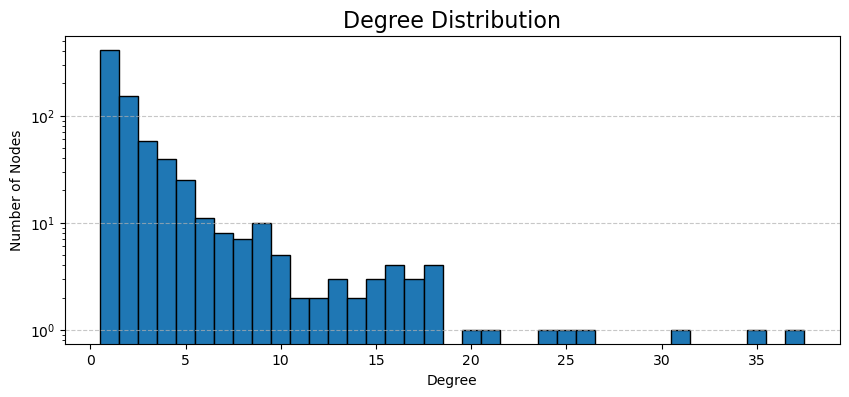

In [83]:
#plotting histogram for degree distribution

degrees = [deg for node, deg in G.degree()]
plt.figure(figsize=(10, 4))
plt.hist(degrees, bins=range(min(degrees), max(degrees)+2 ), edgecolor='black', align='left')
plt.title("Degree Distribution", fontsize=16)
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.show()

8. Add a markdown cell and discuss what you observe by looking at the generated degree distribution. (0.5 points)

ANSWER: In this histogram plot, x axis is degree that  is number of neighbours(connected nodes) and y axis is number of nodes. The plot tells us how many connections each node is having. The maximum degree is only for few nodes in the last. As degree increases, number of nodes have decreased. practical example is a social media where the nodes with maximum degree are celebrities or influencers and the nodes with minimum degree is most common. 


9. Calculate the average degree of a node. (0.5 points)

In [22]:
average_degree = sum(degrees) / nodes
print(f"Average Degree: {average_degree}")

Average Degree: 2.704336399474376


10. Add a markdown cell. In your own words, explain what the obtained average degree of a node mean in the context of this dataset? (0.5 points)
    
ANSWER: Generally in the whole network, average degree is the degree maximum number of nodes have, which means, this is the average number of connections the nodes have with other nodes in a social network. In this context, 2.704336399474376 is the average degree which means almost every user in this network has 2 to 3 connections on an average . 







11. Calculate the average shortest path length between any two nodes. (0.5 
points)

In [23]:
avg_shortest_path = nx.average_shortest_path_length(largest_connected_component)
print(f"Average Shortest Path Length: {avg_shortest_path}")

Average Shortest Path Length: 5.352769901099661


12. Add a markdown cell. In your own words, explain what the obtained value of  the average shortest path length means in the context of this dataset. (0.5 
poins)t

ANSWER Shortest path length is referred to as Distance. 5.352769901099661 is the average shortest path length, which is the average distance between two nodes in the graph. In this context, any two users are seperated by (approx)5 retweets, which means the information can pass very quickly in the network. 






)

13. Plot the distribution of shortest path length. (0.5 points)

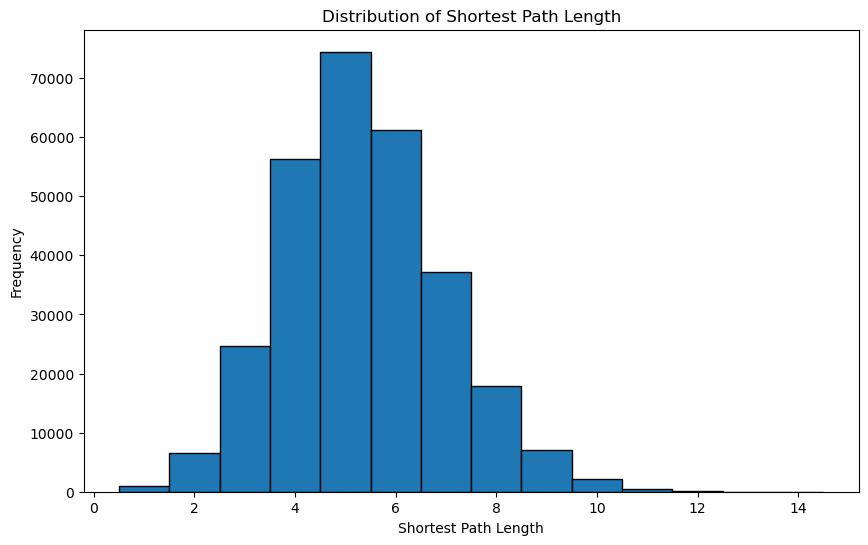

In [84]:
path_lengths = []
for source, targets in nx.all_pairs_shortest_path_length(largest_connected_component):
    for target, length in targets.items():
        if source<target:
            path_lengths.append(length)
#Plotting distribution of shortest path length
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=range(1, max(path_lengths) + 2), edgecolor='black', align='left')
plt.title('Distribution of Shortest Path Length')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.show()

14. Add a markdown cell and explain what you observe in this histogram. (0.5 points)

ANSWER: The above plot has the centered average value as 5, which is the average shortest path length we calculated(approx).Very few users(1 and 11) have many retweets between them,otherwise, the average is retweets is 5 in the plot. 






15. Calculate the edge density of this graph. (0.5 points)

In [29]:
edge_density= nx.density(G)
print(edge_density)

0.003558337367729442


16. Add a markdown cell and answer the following question. What can we conclude about this graph considering its edge density? (0.5 points)

ANSWER: Edge density is how many edges are present in the graph relative to the maximum number of edges that could possibly exist between its nodes.
Edge density= Number of actual edges/ Number of possible edges of the networkk
Ithe edge density is f close to , - the graph is a complete fully connected graph, meaning every node is connected to every other nod
In this context, edge density is almost zero, very low. The network is scattered. Users are not connected to everyone in the network, the suers are connected only to very limited number of nodes. 







17.  Calculate the global clustering coefficient of this graph. (0.5 points) – make 
sure to use the correct function (there are multiple ones. Look for the correct
definition)!

In [27]:
print("Global Clustering coeff:", nx.transitivity(G))

Global Clustering coeff: 0.06019391327767304


18. Add a markdown cell and answer the following question. What can we conclude about this graph considering its global clustering coefficient? (0.5 
poins)
t
ANSWERThe global clustering coefficient of a node defines the fraction of triangles among all closed triplets of nodes. A triplet consists of three nodes that are connected by either two (open triplet) or three (closed triplet) edges. If it is equal to 1: Every possible triplet of nodes in the graph forms a triangle, indicating a highly clustered graph. 
I it isf equas to 0: There are no closed triplets in the graph, suggesting a low clustering with no trianglesIn n this context, 0.06019391327767304 is the global clustering coefficient we g which is almost 0 which means that there are no closed triplets in the graph, suggesting a low clustering with no triangles. This indicates that for an average user, approximately (0.06019391327767304 is the global clustering coefficient) 6% of their connections are also connected to each other.This number seems low, it is significantly higher than what would be expected in a random network of the same scale. :




)

19. Calculate the number of connected components in the graph. (0.5 points)

In [30]:
num_components = nx.number_connected_components(G)
print(f"Number of Connected Components: {num_components}")

Number of Connected Components: 1


20. Report 10 nodes with the highest degree centrality (1 point)

In [31]:
degree_centrality = nx.degree_centrality(G)
ten_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("10 nodes with the highest degree centrality are:")
for node, centrality in ten_degree:
  print(f" Node {node}: {centrality}")

10 nodes with the highest degree centrality are:
 Node 136: 0.04868421052631579
 Node 157: 0.046052631578947366
 Node 692: 0.04078947368421053
 Node 357: 0.034210526315789476
 Node 396: 0.03289473684210526
 Node 9: 0.031578947368421054
 Node 685: 0.02763157894736842
 Node 492: 0.02631578947368421
 Node 76: 0.02368421052631579
 Node 228: 0.02368421052631579


21. Report 10 nodes with the highest betweenness centrality (1 point)

In [32]:
betweenness_centrality = nx.betweenness_centrality(G)
ten_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("10 nodes with the highest betweenness centrality are:")
for node, centrality in ten_betweenness:
  print(f" Node {node}: {centrality}")

10 nodes with the highest betweenness centrality are:
 Node 157: 0.2331597073300534
 Node 136: 0.15706245723615098
 Node 227: 0.13549367337193458
 Node 396: 0.12400787148396059
 Node 692: 0.11823106720707746
 Node 638: 0.10943877357975558
 Node 685: 0.10793446345474106
 Node 357: 0.09089348448157598
 Node 656: 0.08464618434206711
 Node 377: 0.0836081581317694


22. Report 10 nodes with the highest closeness centrality (1 point)

In [33]:
closeness_centrality = nx.closeness_centrality(largest_connected_component)
ten_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("10 nodes with the highest closeness centrality are:")
for node, centrality in ten_closeness:
  print(f" Node {node}: {centrality}")

10 nodes with the highest closeness centrality are:
 Node 157: 0.308191403081914
 Node 519: 0.28864413216862894
 Node 685: 0.2883156297420334
 Node 622: 0.28305400372439476
 Node 656: 0.28305400372439476
 Node 396: 0.2822131451912365
 Node 520: 0.2822131451912365
 Node 136: 0.28085735402808576
 Node 692: 0.2783882783882784
 Node 227: 0.2766654532216964


23. Report 10 nodes with the highest Eigenvector centrality (1 point)

In [34]:
eigenvector_centrality = nx.eigenvector_centrality(G)
ten_eigenvector = sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True)[:10]
print("10 nodes with the highest eigenvector centrality are:")
for node, centrality in ten_eigenvector:
  print(f" Node {node}: {centrality}")

10 nodes with the highest eigenvector centrality are:
 Node 157: 0.3841096966792422
 Node 692: 0.26672488452447496
 Node 357: 0.2445175913862377
 Node 685: 0.22991834763704214
 Node 76: 0.20479175690077364
 Node 622: 0.19064239713331127
 Node 350: 0.18768681094672698
 Node 656: 0.17842648561013866
 Node 734: 0.1739034669340299
 Node 519: 0.17342166407472048


24. Add a markdown cell and answer the following question. What do you observe by looking at the top 10 nodes for each centrality? Explain in you 
own words (e.g., which nodes appe r multiple times, which nodes on  
showed up in top 10 in one of the centralities, etc.) (0.5 pots)
in
ANSWE From all the four centrality measures list, it is clear that many of the nodes in all the lists are same. For eaxmple, nodes like 157, 685, 136, 227, 357, 622, 692, 396, 76 and many more appear in more than one list. It tells us that there is presence of influential users in the network. The nodes in the above 4 lists have the most connections (degree centrality), how important the users are in connecting other users (betweenness centrality), they can reach other users easily  quickly (closeness centrality), and how important the user's direct connections are (eigenvector centrality). R:




s)

25. For each centrality, plot a histogram of its distribution (a total of 4 
histograms for this question). (4x 0.5 points = 2 points)

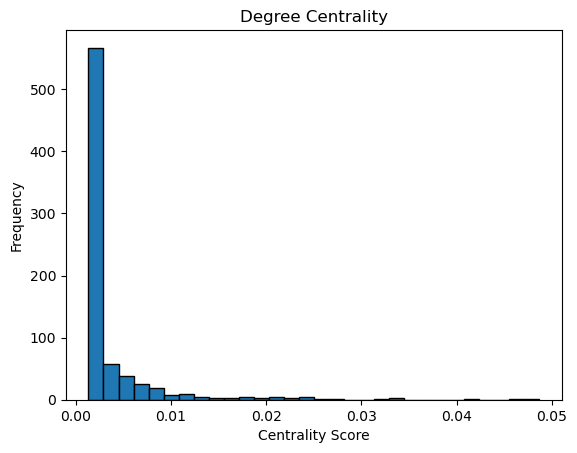

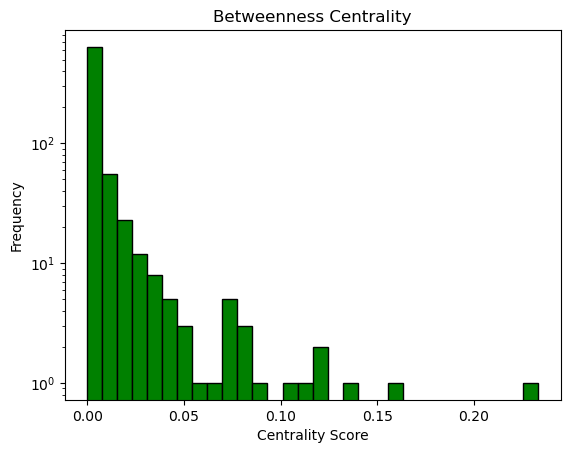

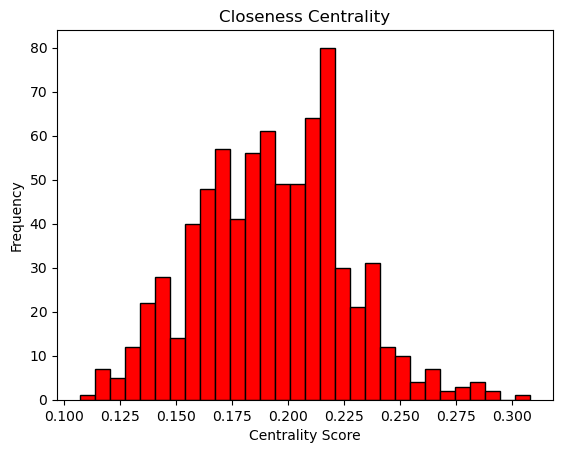

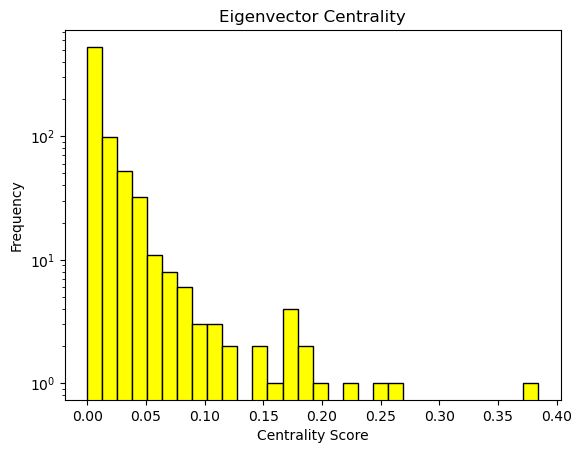

In [35]:
# Degree Centrality
plt.hist(degree_centrality.values(), bins=30,edgecolor='black')
plt.title('Degree Centrality')
plt.xlabel('Centrality Score')
plt.ylabel('Frequency')
plt.show()

# Betweenness Centrality
plt.hist(betweenness_centrality.values(), bins=30, color='green',edgecolor='black')
plt.title('Betweenness Centrality')
plt.yscale('log') # Log scale needed due to extreme skew
plt.xlabel('Centrality Score')
plt.ylabel('Frequency')
plt.show()

# Closeness Centrality
plt.hist(closeness_centrality.values(), bins=30, color='red',edgecolor='black')
plt.title('Closeness Centrality')
plt.xlabel('Centrality Score')
plt.ylabel('Frequency')
plt.show()

# Eigenvector Centrality
plt.hist(eigenvector_centrality.values(), bins=30, color='yellow',edgecolor='black')
plt.title('Eigenvector Centrality')
plt.yscale('log') # Log scale needed due to extreme skew
plt.xlabel('Centrality Score')
plt.ylabel('Frequency')
plt.show()


26. Under each histogram, add a markdown cell and in your own words, explain what your observation is. (4x 0.5 points = 2 points)

ANSWER:
(a) DEGREE CENTRALITY: Degree centrality ranks nodes with more connections higher in terms of centrality. The distribution is extremely skewed to the right(positive skew), showing a classic "long tail." This is a power-law distribution, which is very common in social networks. It means that the vast majority of users have very low degree centrality (very few connections), while a tiny number of users act as "hubs" with extremely high centrality.

(b) BETWEENNESS CENTRALITY: Betweennes centrality of node i is fraction of shortest paths passing through a selected node.It says us how often a node is on the shortest path between two nodes (serves as a bridge) i.e. the node is important in connecting different parts of the network.  This distribution is even more skewed than the degree centrality.  g majority of nodes have a betweenness centrality score at or very near zero. This indicates that most users are not "bridges" and do not lie on the shortest paths connecting other users. A very small number of nodes have high betweenness scores, meaning they are critical for the flow of information across different parts of the network. Removing these nodes would likely disconnect communities.


(c) CLOSENESS CENTRALITY: Closeness is based on the length of the average shortest path between a vertex and all vertices in the graph.It says how close a node is to all other nodes i.e. can access and influence the entire network quickly.  Unnlike the others, this distribution is skewed to the left(negative skew). The bulk of the nodes are clustered together in the middle-to-high range of closeness scores. This is a classic sign of a "small-world" network, where most nodes are relatively close to one another and can spread information efficientle.


(d) EIGENVECTOR CENTRALITY: Similar to degree and betweenness, this distribution is extremely skewed to the right. A massive number of nodes have an eigenvector centrality near zero.

27. For each centrality, visualize a network where the size of the nodes 
corresponds to the centrality values (4 plots). (4x 0.5 points = 2 points)


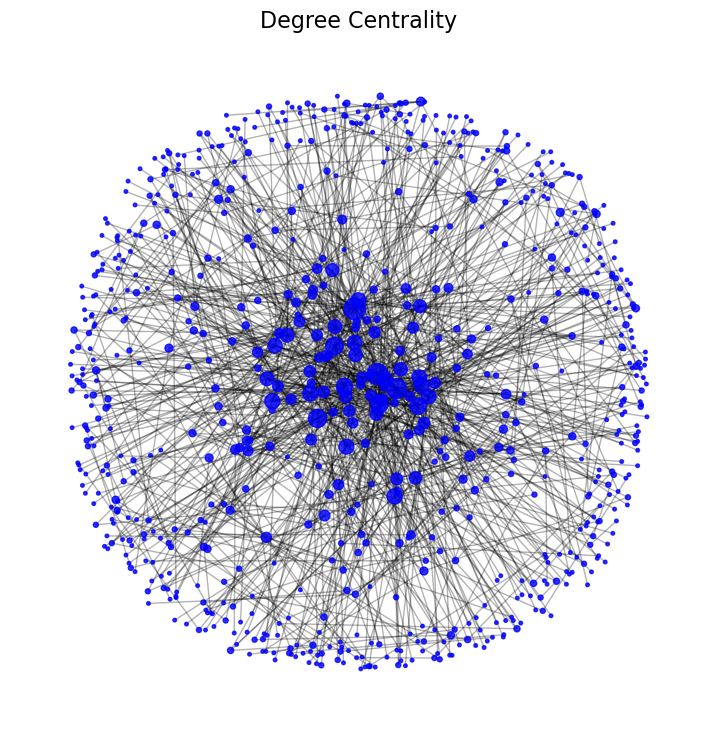

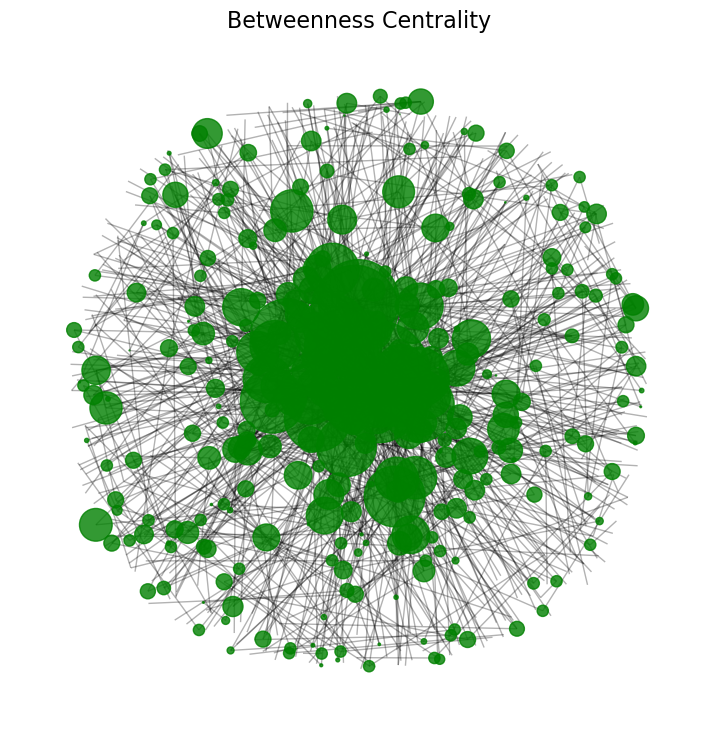

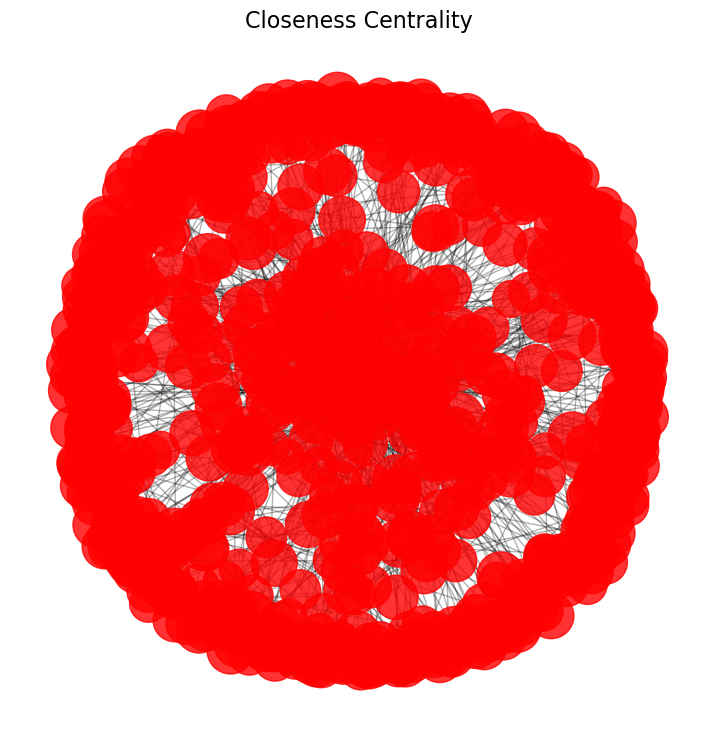

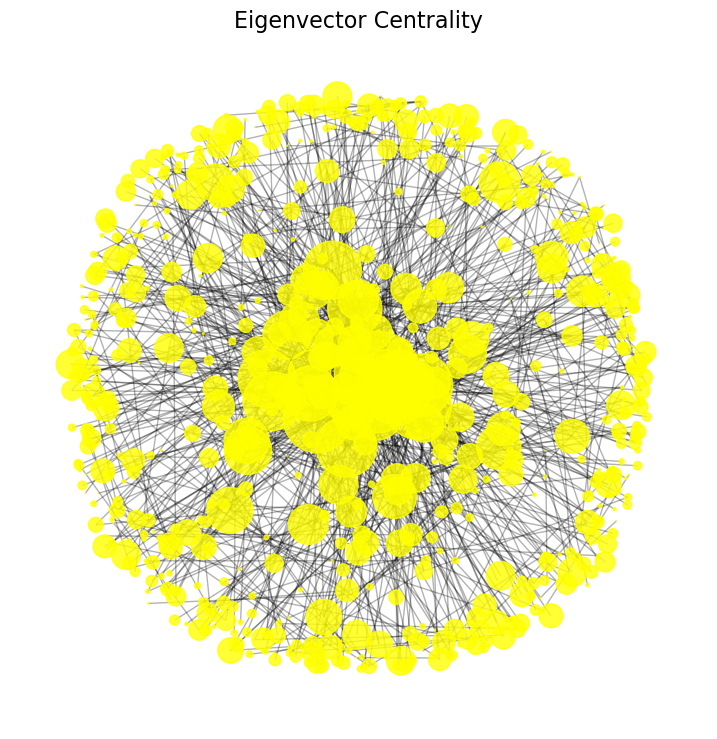

In [85]:
def draw(G, pos, measures, measure_name, scaling_factor, color):
    plt.figure(figsize=(9,9)) 
    node_sizes = [measures.get(node, 0) * scaling_factor for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, 
                           node_size=node_sizes, 
                           node_color=color,
                           alpha=0.8)                          
    nx.draw_networkx_edges(G, pos, edge_color="black", alpha=0.3)
    plt.title(measure_name, fontsize=16)
    plt.axis('off')
    plt.show()

pos = nx.spring_layout(G, seed=675, k=0.45)

#calculating the measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)


#  Degree Centrality 
draw(G, pos, degree_centrality, 'Degree Centrality', 
             scaling_factor=5000, color='blue')

#  Betweenness Centrality 
draw(G, pos, betweenness_centrality, 'Betweenness Centrality', 
             scaling_factor=25000, color='green')

# Closeness Centrality 
draw(G, pos, closeness_centrality, 'Closeness Centrality', 
             scaling_factor=5000, color='red')

# Eigenvector Centrality 
draw(G, pos, eigenvector_centrality, 'Eigenvector Centrality', 
             scaling_factor=10000, color='yellow')